In [1]:
import re
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
poems = []
with open('data.csv', 'r', encoding='utf-8') as file:
    csv_reader = csv.DictReader(file)

    for index, row in enumerate(csv_reader):
        poem_content = row['content']
        poems.append(poem_content)
    
for poem in poems:
    print(poem)


平林漠漠烟如织，寒山一带伤心碧。暝色入高楼，有人楼上愁。玉阶空伫立，宿鸟归飞急。何处是归程？长亭更短亭。


箫声咽，秦娥梦断秦楼月。秦楼月，年年柳色，灞陵伤别。乐游原上清秋节，咸阳古道音尘绝。音尘绝，西风残照，汉家陵阙。


秋风清，秋月明，落叶聚还散，寒鸦栖复惊。相思相见知何日？此时此夜难为情！入我相思门，知我相思苦，长相思兮长相忆，短相思兮无穷极，早知如此绊人心，何如当初莫相识。


西塞山前白鹭飞，桃花流水鳜鱼肥。青箬笠，绿蓑衣，斜风细雨不须归。


边草，边草，边草尽来兵老。山南山北雪晴， 千里万里月明。明月，明月，胡笳一声愁绝。


团扇，团扇，美人病来遮面。玉颜憔悴三年，谁复商量管弦。弦管，弦管，春草昭阳路断。


山桃红花满上头，蜀江春水拍山流。花红易衰似郎意，水流无限似侬愁。


斑竹枝，斑竹枝，泪痕点点寄相思。楚客欲听瑶瑟怨，潇湘深夜月明时。


江南好，风景旧曾谙。日出江花红胜火，春来江水绿如蓝。能不忆江南？

江南好，风景旧曾谙。日出江花红胜火，春来江水绿如蓝。能不忆江南？江南忆，最忆是杭州。山寺月中寻桂子，郡亭枕上看潮头。何日更重游？江南忆，其次忆吴宫。吴酒一杯春竹叶，吴娃双舞醉芙蓉。早晚复相逢？

汴水流，泗水流，流到瓜州古渡头。吴山点点愁。思悠悠，恨悠悠，恨到归时方始休。月明人倚楼。


花非花，雾非雾。夜半来，天明去。来如春梦几多时？去似朝云无觅处。


借问江潮与海水，何似君情与妾心？相恨不如潮有信，相思始觉海非深。


菡萏香连十顷陂，小姑贪戏采莲迟。晚来弄水船头湿，更脱红裙裹鸭儿。


兰烬落，屏上暗红蕉。闲梦江南梅熟日，夜船吹笛雨萧萧。人语驿边桥。


梳洗罢，独倚望江楼。过尽千帆皆不是，斜晖脉脉水悠悠。肠断白蘋洲。


小山重叠金明灭，鬓云欲度香腮雪。懒起画蛾眉，弄妆梳洗迟。照花前后镜，花面交相映。新帖绣罗襦，双双金鹧鸪。


柳丝长，春雨细，花外漏声迢递。惊塞雁，起城乌，画屏金鹧鸪。香雾薄，透帘幕，惆怅谢家池阁。红烛背，绣帘垂，梦长君不知。


红楼别夜堪惆怅，香灯半卷流苏帐。残月出门时，美人和泪辞。琵琶金翠羽，弦上黄莺语。劝我早还家，绿窗人似花。


人人尽说江南好，游人只合江南老。春水碧于天，画船听雨眠。垆边人似月，皓腕凝霜雪。未老莫还乡，还乡须断肠。


劝君今夜须沉醉，尊前莫话明朝事。珍重主人心，酒深情亦深。须愁

In [3]:
# 去除标点的数据准备
cleaned_poems = [re.sub(r'[^\w\s]', '', poem) for poem in poems]
cleaned_poems = [re.sub(r'[\s\n]', '', poem) for poem in cleaned_poems]
# 构建词汇表
vocab = set("".join(cleaned_poems))
vocab_size = len(vocab)
char_to_index = {char: i for i, char in enumerate(vocab)}
index_to_char = {i: char for i, char in enumerate(vocab)}


In [4]:
print(vocab)
print(vocab_size)
print(char_to_index)
print(index_to_char)

{'谋', '治', '许', '繁', '杰', '森', '艋', '层', '凝', '摇', '价', '彦', '挹', '晨', '全', '泥', '隔', '翁', '骛', '促', '露', '稳', '貂', '唾', '粤', '东', '捉', '骖', '足', '叟', '复', '诗', '灯', '睛', '上', '暮', '丹', '贴', '村', '琢', '秤', '庶', '碗', '浪', '占', '髻', '菊', '吕', '竟', '谢', '麾', '曾', '表', '底', '朵', '芦', '惨', '岑', '其', '空', '倥', '絮', '明', '鬟', '嶂', '健', '剩', '星', '倚', '困', '气', '犬', '犹', '递', '鸳', '浩', '唇', '曲', '简', '因', '齐', '芝', '工', '偷', '尖', '于', '鸡', '联', '捧', '恃', '凄', '脱', '安', '忙', '阻', '腰', '薰', '逾', '飕', '粱', '艺', '耕', '葆', '萼', '鳷', '怯', '歌', '之', '棹', '会', '减', '徘', '排', '筵', '俄', '尾', '直', '孤', '道', '觅', '鹂', '制', '剑', '杵', '礴', '以', '愤', '返', '总', '嘶', '袍', '胧', '澌', '邵', '仍', '奁', '般', '败', '熔', '追', '婆', '矣', '轰', '必', '私', '战', '紞', '栽', '及', '腕', '樱', '劈', '阖', '通', '唯', '旗', '裳', '笳', '修', '习', '亩', '衫', '沉', '呵', '主', '鼠', '尊', '殿', '桃', '尧', '章', '封', '苑', '线', '康', '郴', '溜', '龟', '鹧', '蟾', '男', '病', '鉴', '送', '林', '蒲', '澈', '梦', '塍', '竞', '累', '鹖', '潭', '炬', '鼎', '抚', '罗', '恐', '体', '似',

In [5]:
# 将诗歌转换为数字序列
def poem_to_indices(poem):
    return [char_to_index[char] for char in poem]

In [6]:
# 构建输入输出数据
X = []
y = []
for poem in cleaned_poems:
    indices = poem_to_indices(poem)
    print(indices)
    for i in range(len(indices) - 1):
        # if(i==0):continue
        X.append(indices[i])
        y.append(indices[i + 1])

# 将数据转换为numpy数组
X = np.array(X)
y = np.array(y)


[1667, 184, 1377, 1377, 425, 1657, 813, 1045, 1637, 721, 1032, 1218, 1846, 1617, 1804, 1075, 283, 2050, 655, 1449, 1848, 655, 34, 1769, 1828, 1306, 59, 670, 698, 204, 1945, 483, 1686, 1894, 663, 1886, 554, 483, 2037, 1727, 1446, 1426, 1312, 1446]
[1012, 1471, 1681, 1801, 1634, 187, 1041, 1801, 655, 1878, 1801, 655, 1878, 1233, 1233, 1463, 1075, 436, 970, 1218, 512, 726, 780, 1597, 34, 1494, 432, 767, 388, 1093, 1799, 118, 734, 572, 1766, 734, 572, 1766, 239, 519, 595, 684, 1143, 948, 970, 912]
[432, 519, 1494, 432, 1878, 62, 484, 1604, 967, 995, 438, 1045, 1682, 2069, 30, 1641, 1470, 793, 1470, 806, 964, 663, 355, 1889, 1173, 1889, 203, 987, 226, 879, 283, 517, 1470, 793, 1180, 964, 517, 1470, 793, 814, 1727, 1470, 793, 471, 1727, 1470, 1034, 1312, 1470, 793, 471, 668, 2068, 361, 723, 964, 1657, 1889, 507, 1848, 1846, 663, 1657, 1235, 590, 1579, 1470, 1270]
[239, 682, 1637, 1368, 1110, 383, 1686, 168, 953, 1205, 397, 1409, 843, 409, 1515, 816, 1794, 509, 474, 925, 536, 519, 737, 1629, 

In [84]:
index_to_char[1957]

'城'

In [85]:
index_to_char[1602]

'支'

In [91]:
X

array([ 336, 1253, 1303, ..., 2056,  705,  519])

In [92]:
y

array([1253, 1303, 1303, ...,  705,  519, 1250])

In [7]:
vocab_size

2096

In [7]:
# 定义RNN参数
input_size = vocab_size
hidden_size = 50
output_size = vocab_size
learning_rate = 0.01

In [8]:
# 参数初始化
hidden_size = 50  # 增加隐藏层大小
seq_length = 20  # 每批训练的序列长度
learning_rate = 0.1

In [9]:
# 初始化权重
Wxh = np.random.randn(hidden_size, input_size) * 0.01
Whh = np.random.randn(hidden_size, hidden_size) * 0.01
Why = np.random.randn(output_size, hidden_size) * 0.01
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))

In [10]:
Wxh

array([[-0.00206756, -0.01724141,  0.0084053 , ...,  0.00250748,
         0.00684094, -0.00017894],
       [-0.0086836 ,  0.01702607, -0.02113477, ..., -0.02079496,
        -0.01156793, -0.01404621],
       [-0.00702352,  0.00740892, -0.00364056, ...,  0.00691295,
         0.00189195, -0.00028415],
       ...,
       [-0.00655311, -0.00651609, -0.01312461, ..., -0.01004899,
        -0.00544662,  0.01201566],
       [ 0.01422984,  0.01010061, -0.01251244, ..., -0.00657342,
         0.0023826 , -0.01636232],
       [-0.00642697, -0.01542258, -0.00755957, ..., -0.01521484,
         0.00329312, -0.00292956]])

In [12]:
bh

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [11]:
# 前向传播和反向传播函数定义
def forward_backward(inputs, targets, hprev):
    xs, hs, ys, ps = {}, {}, {}, {}
    hs[-1] = np.copy(hprev)
    loss = 0

    # 前向传播
    for t in range(len(inputs)):
        xs[t] = np.zeros((input_size, 1))
        xs[t][inputs[t]] = 1
        hs[t] = np.tanh(np.dot(Wxh, xs[t]) + np.dot(Whh, hs[t-1]) + bh)
        ys[t] = np.dot(Why, hs[t]) + by
        ps[t] = np.exp(ys[t]) / np.sum(np.exp(ys[t]))
        loss += -np.log(ps[t][targets[t], 0])

    # 反向传播
    dWxh, dWhh, dWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    dbh, dby = np.zeros_like(bh), np.zeros_like(by)
    dhnext = np.zeros_like(hs[0])

    for t in reversed(range(len(inputs))):
        dy = np.copy(ps[t])
        dy[targets[t]] -= 1
        dWhy += np.dot(dy, hs[t].T)
        dby += dy
        dh = np.dot(Why.T, dy) + dhnext
        dhraw = (1 - hs[t] * hs[t]) * dh
        dbh += dhraw
        dWxh += np.dot(dhraw, xs[t].T)
        dWhh += np.dot(dhraw, hs[t-1].T)
        dhnext = np.dot(Whh.T, dhraw)

    return loss, dWxh, dWhh, dWhy, dbh, dby, hs[len(inputs)-1]

In [19]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [11]:
# 调整后的训练函数
def train(data, iter_num):
    n, p = 0, 0
    hprev = np.zeros((hidden_size, 1))

    for i in range(iter_num):
        hprev = np.zeros((hidden_size, 1))  # 重置隐藏状态

        for line in data:
            if len(line) < 2:  # 跳过空行或单字符行
                continue

            inputs = [char_to_index[line[0]]]  # 使用首个字符作为输入
            targets = [char_to_index[char] for char in line[1:]]  # 目标是整行诗的剩余部分

            loss, dWxh, dWhh, dWhy, dbh, dby, hprev = forward_backward(inputs, targets, hprev)

            for param, dparam in zip([Wxh, Whh, Why, bh, by], [dWxh, dWhh, dWhy, dbh, dby]):
                param += -learning_rate * dparam

            if n % 100 == 0:
                print(f"Epoch {n}, Loss: {loss}")
            n += 1

In [20]:
# 训练模型
def train(data, iter_num):
    losses = []
    num_losses = []
    n, p = 0, 0
    hprev = np.zeros((hidden_size, 1))
    smooth_loss = -np.log(1.0/vocab_size)*seq_length

    for i in range(iter_num):
        # 准备输入和输出数据
        if p+seq_length+1 >= len(data) or n == 0: 
            hprev = np.zeros((hidden_size, 1))
            p = 0
        inputs = [char_to_index[ch] for ch in data[p:p+seq_length]]
        targets = [char_to_index[ch] for ch in data[p+1:p+seq_length+1]]
        # 前向传播和反向传播
        loss, dWxh, dWhh, dWhy, dbh, dby, hprev = forward_backward(inputs, targets, hprev)
        # 参数更新
        for param, dparam in zip([Wxh, Whh, Why, bh, by],
                                [dWxh, dWhh, dWhy, dbh, dby]):
            param += -learning_rate * dparam

        p += seq_length
        n += 1

        if n % 100 == 0:
            print(f"Epoch {n}, Loss: {loss}")
            losses.append(loss)
        
        num_loss = {loss:i}
        num_losses.append(num_loss)
        
    if(i==iter_num-1):
        # 创建一个折线图
        # plt.plot(losses)
        plt.scatter(range(len(losses)), losses, color='red', marker='o')
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
        plt.plot(losses)
        plt.title('Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
        num = min(losses)
        for i in num_losses:
            if num in i:
                print(i[num])
        print(num)

In [12]:
import numpy as np

def train(data, iter_num, learning_rate=1e-3, grad_clip=5, use_adam=False, beta1=0.9, beta2=0.999, epsilon=1e-8):
    losses = []
    n, p = 0, 0
    mWxh, mWhh, mWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    mbh, mby = np.zeros_like(bh), np.zeros_like(by)
    vWxh, vWhh, vWhy = np.zeros_like(Wxh), np.zeros_like(Whh), np.zeros_like(Why)
    vbh, vby = np.zeros_like(bh), np.zeros_like(by)
    hprev = np.zeros((hidden_size, 1))

    for i in range(iter_num):
        # 准备输入和输出数据
        if p+seq_length+1 >= len(data) or n == 0: 
            hprev = np.zeros((hidden_size, 1))
            p = 0
        inputs = [char_to_index[ch] for ch in data[p:p+seq_length]]
        targets = [char_to_index[ch] for ch in data[p+1:p+seq_length+1]]

        # 前向传播和反向传播
        loss, dWxh, dWhh, dWhy, dbh, dby, hprev = forward_backward(inputs, targets, hprev)

        # 梯度裁剪以防止梯度爆炸
        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -grad_clip, grad_clip, out=dparam)

        # 参数更新
        if use_adam:
            for param, dparam, m, v in zip([Wxh, Whh, Why, bh, by],
                                           [dWxh, dWhh, dWhy, dbh, dby],
                                           [mWxh, mWhh, mWhy, mbh, mby],
                                           [vWxh, vWhh, vWhy, vbh, vby]):
                m = beta1 * m + (1 - beta1) * dparam
                v = beta2 * v + (1 - beta2) * (dparam ** 2)
                m_hat = m / (1 - beta1 ** (n+1))
                v_hat = v / (1 - beta2 ** (n+1))
                param += -learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        else:
            for param, dparam in zip([Wxh, Whh, Why, bh, by], [dWxh, dWhh, dWhy, dbh, dby]):
                param += -learning_rate * dparam

        p += seq_length
        n += 1

        if n % 100 == 0:
            print(f"Epoch {n}, Loss: {loss}")
            losses.append(loss)

    # 绘制损失图
    plt.plot(range(len(losses)), losses, color='red', marker='o')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


In [13]:
data = ''.join(cleaned_poems)
train(data, iter_num=10000)

Epoch 100, Loss: 152.89722129737765
Epoch 200, Loss: 152.64430849472558
Epoch 300, Loss: 152.61207817083027
Epoch 400, Loss: 152.86506669524536
Epoch 500, Loss: 152.62843283849648
Epoch 600, Loss: 152.53138972856866
Epoch 700, Loss: 152.19389409682202


KeyboardInterrupt: 

Epoch 100, Loss: 152.36746152327524
Epoch 200, Loss: 149.59685468980274
Epoch 300, Loss: 137.27369153610508
Epoch 400, Loss: 151.13902354669307
Epoch 500, Loss: 136.0941144380244
Epoch 600, Loss: 137.34478785547284
Epoch 700, Loss: 130.23799479381336
Epoch 800, Loss: 134.1127885063286
Epoch 900, Loss: 133.53404119084976
Epoch 1000, Loss: 132.00237569634223


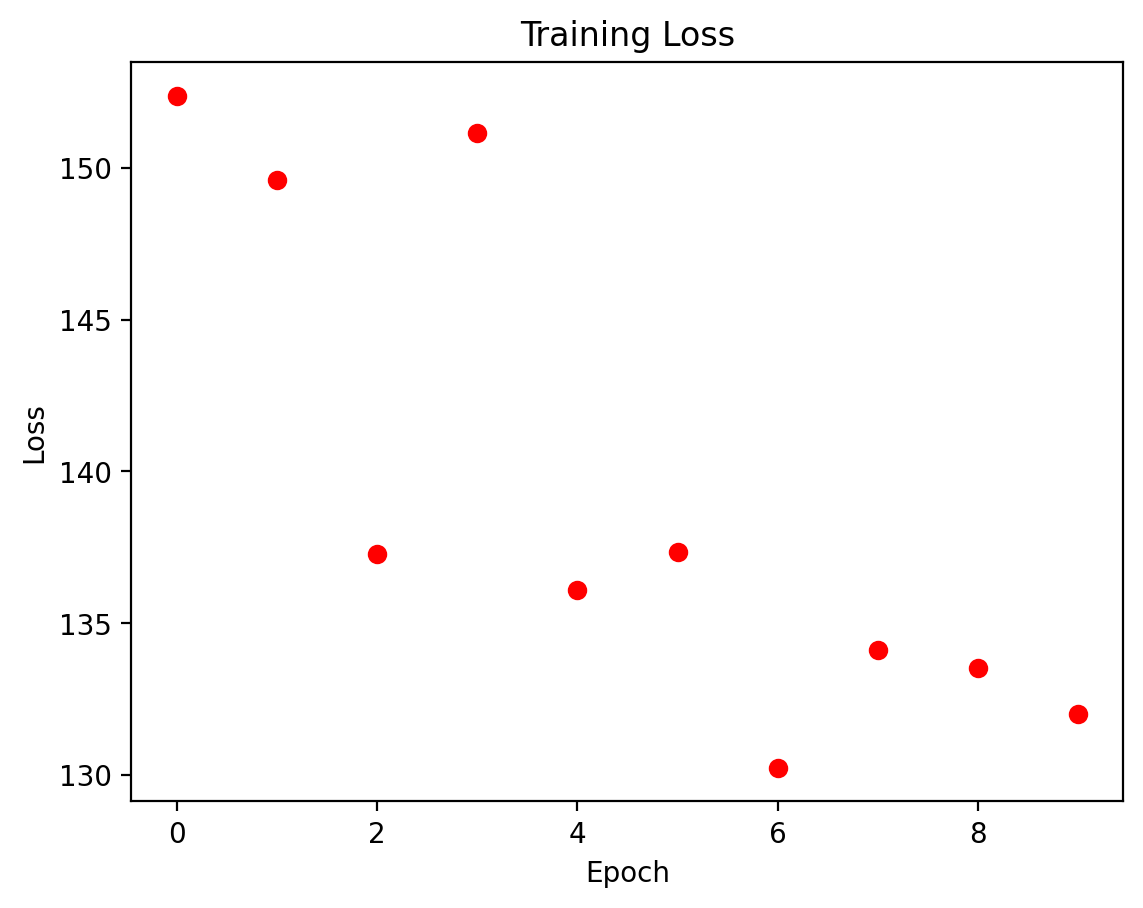

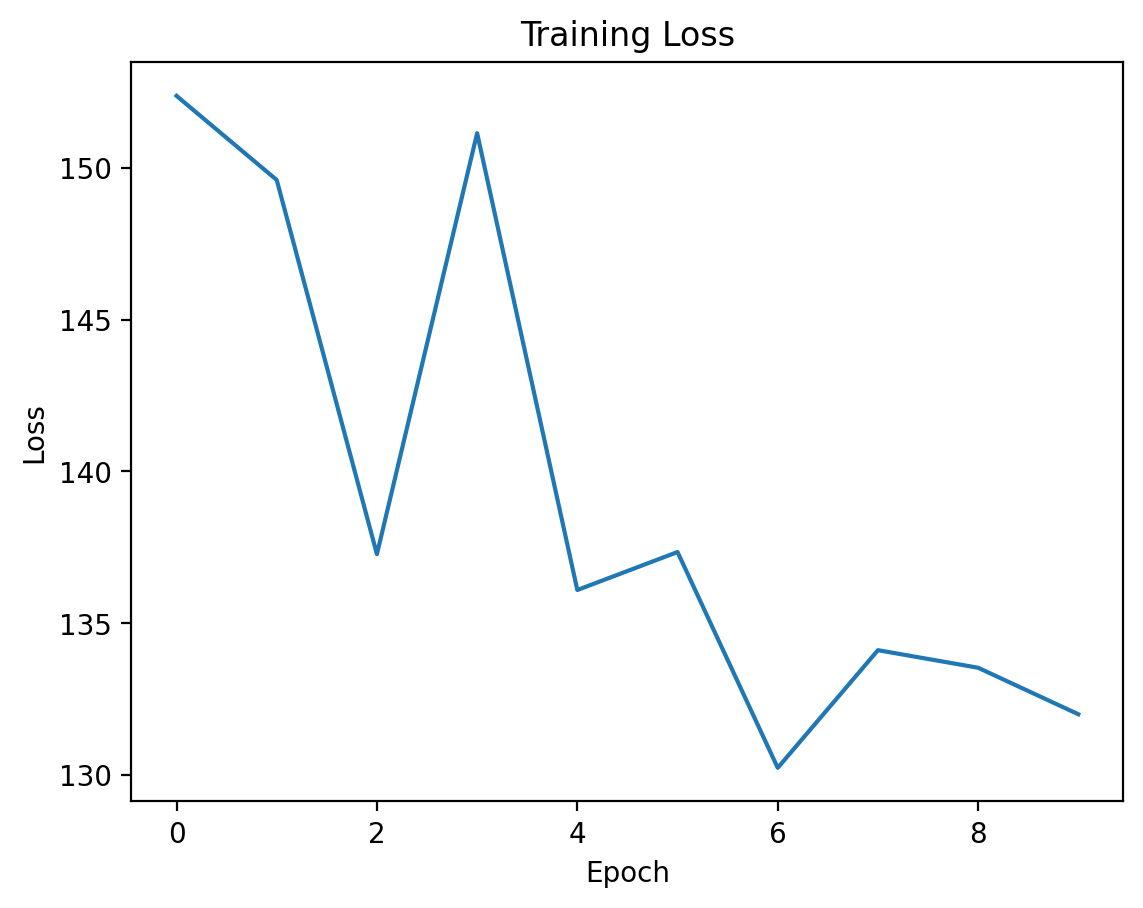

699
130.23799479381336


In [102]:
data = ''.join(cleaned_poems)
train(data, iter_num=1000)

In [103]:
def generate_line(start_char, length=5):
    # 如果起始字符不在词汇表中，使用一个随机字符进行后续生成
    if start_char not in char_to_index:
        random_char = np.random.choice(list(vocab))
        start_index = char_to_index[random_char]
    else:
        start_index = char_to_index[start_char]

    x = np.zeros((input_size, 1))
    x[start_index] = 1
    h = np.zeros((hidden_size, 1))
    indices = [start_index]  # 使用选择或随机字符的索引开始

    for _ in range(length - 1):  # 减去 1 因为起始字符已经确定
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y_hat = np.dot(Why, h) + by
        prob = np.exp(y_hat) / np.sum(np.exp(y_hat))
        next_char = np.random.choice(range(vocab_size), p=prob.ravel())
        indices.append(next_char)
        x = np.zeros((input_size, 1))
        x[next_char] = 1

    # 将生成的诗句的第一个字符替换为原始的起始字符
    generated_poem = "".join(index_to_char[i] for i in indices)
    return start_char + generated_poem[1:]

input_chars = input("请输入藏头诗的头，以空格分隔: ").split(' ')

for char in input_chars:
    generated_line = generate_line(char, length=5)
    print(generated_line)


新学聊媒一
春固昨结向
快付舴处子
乐处鹧过白


In [105]:
import numpy as np
import pickle

np.save('Wxh.npy', Wxh)
np.save('Whh.npy', Whh)
np.save('Why.npy', Why)
np.save('bh.npy', bh)
np.save('by.npy', by)

with open('char_to_index.pickle', 'wb') as handle:
    pickle.dump(char_to_index, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('index_to_char.pickle', 'wb') as handle:
    pickle.dump(index_to_char, handle, protocol=pickle.HIGHEST_PROTOCOL)
